# Import Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Prepare the CIFAR10 dataset

## Load Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


## Verify Dataset

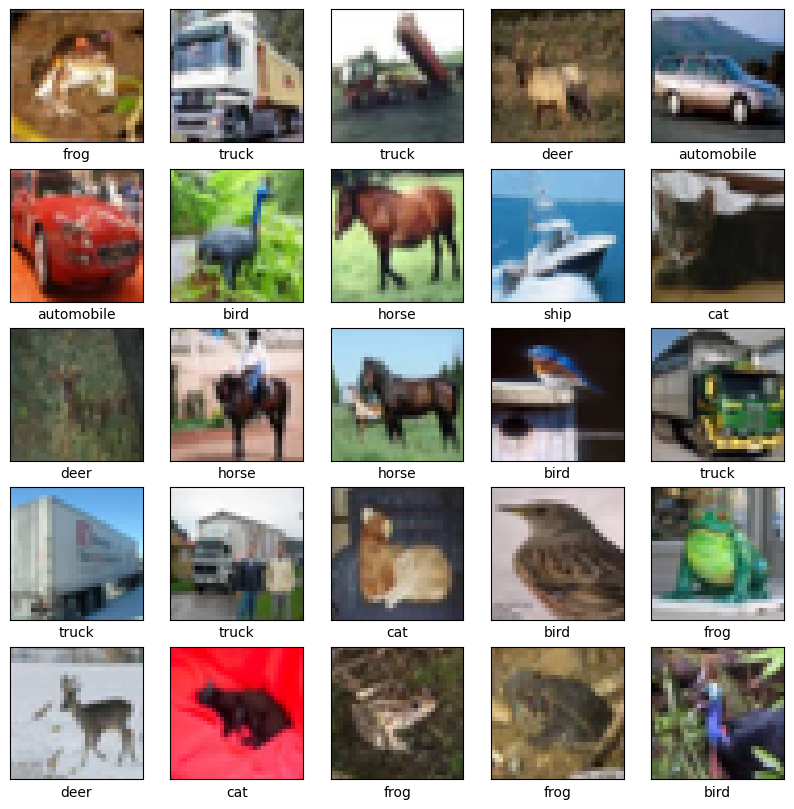

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# CNN Model in tutorial

## Model Definition

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3612 - loss: 1.7246 - val_accuracy: 0.5605 - val_loss: 1.2334
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.5944 - loss: 1.1491 - val_accuracy: 0.6318 - val_loss: 1.0479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.6637 - loss: 0.9643 - val_accuracy: 0.6466 - val_loss: 1.0085
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7032 - loss: 0.8534 - val_accuracy: 0.6803 - val_loss: 0.9231
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7319 - loss: 0.7705 - val_accuracy: 0.7041 - val_loss: 0.8642
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7478 - loss: 0.7131 - val_accuracy: 0.7028 - val_loss: 0.8689
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7710 - loss: 0.6511 - val_accuracy: 0.7066 - val_loss: 0.8553
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7857 -

## Evaluate the model

313/313 - 4s - 11ms/step - accuracy: 0.7049 - loss: 0.9012


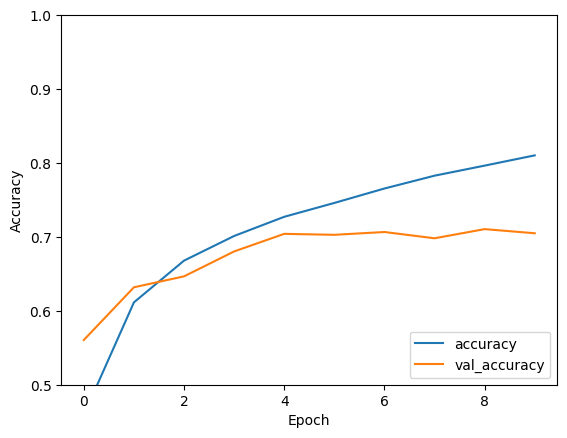

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Testing on my Image

### Plane Picture

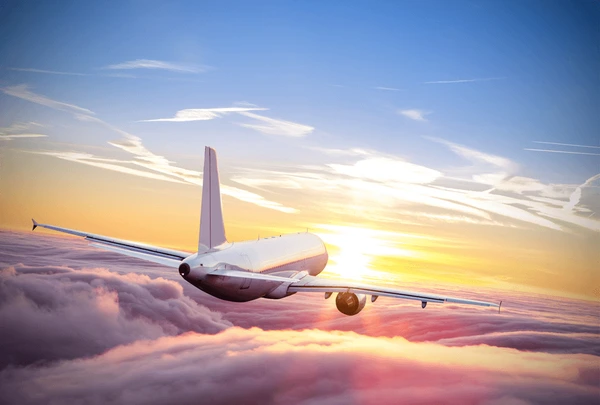

In [13]:
# Load an image
plane_image = cv2.imread('airplane.webp')

# Display the image (optional)
cv2_imshow(plane_image)

### Verify the model

In [16]:
# Reshape image
plane_image = cv2.resize(plane_image, (32,32))

prediction = model.predict(np.expand_dims(plane_image, axis=0))
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {class_names[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Label: airplane


### Cat Picture

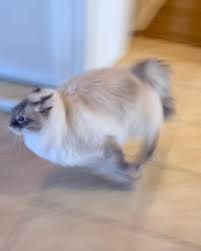

In [20]:
# Load an image
cat_image = cv2.imread('cat.jpeg')

# Display the image (optional)
cv2_imshow(cat_image)

### Verify the model

In [21]:
# Reshape image
cat_image = cv2.resize(cat_image, (32,32))

prediction2 = model.predict(np.expand_dims(cat_image, axis=0))
predicted_label2 = np.argmax(prediction2)

print(f"Predicted Label: {class_names[predicted_label2]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: airplane


### Frog Picture

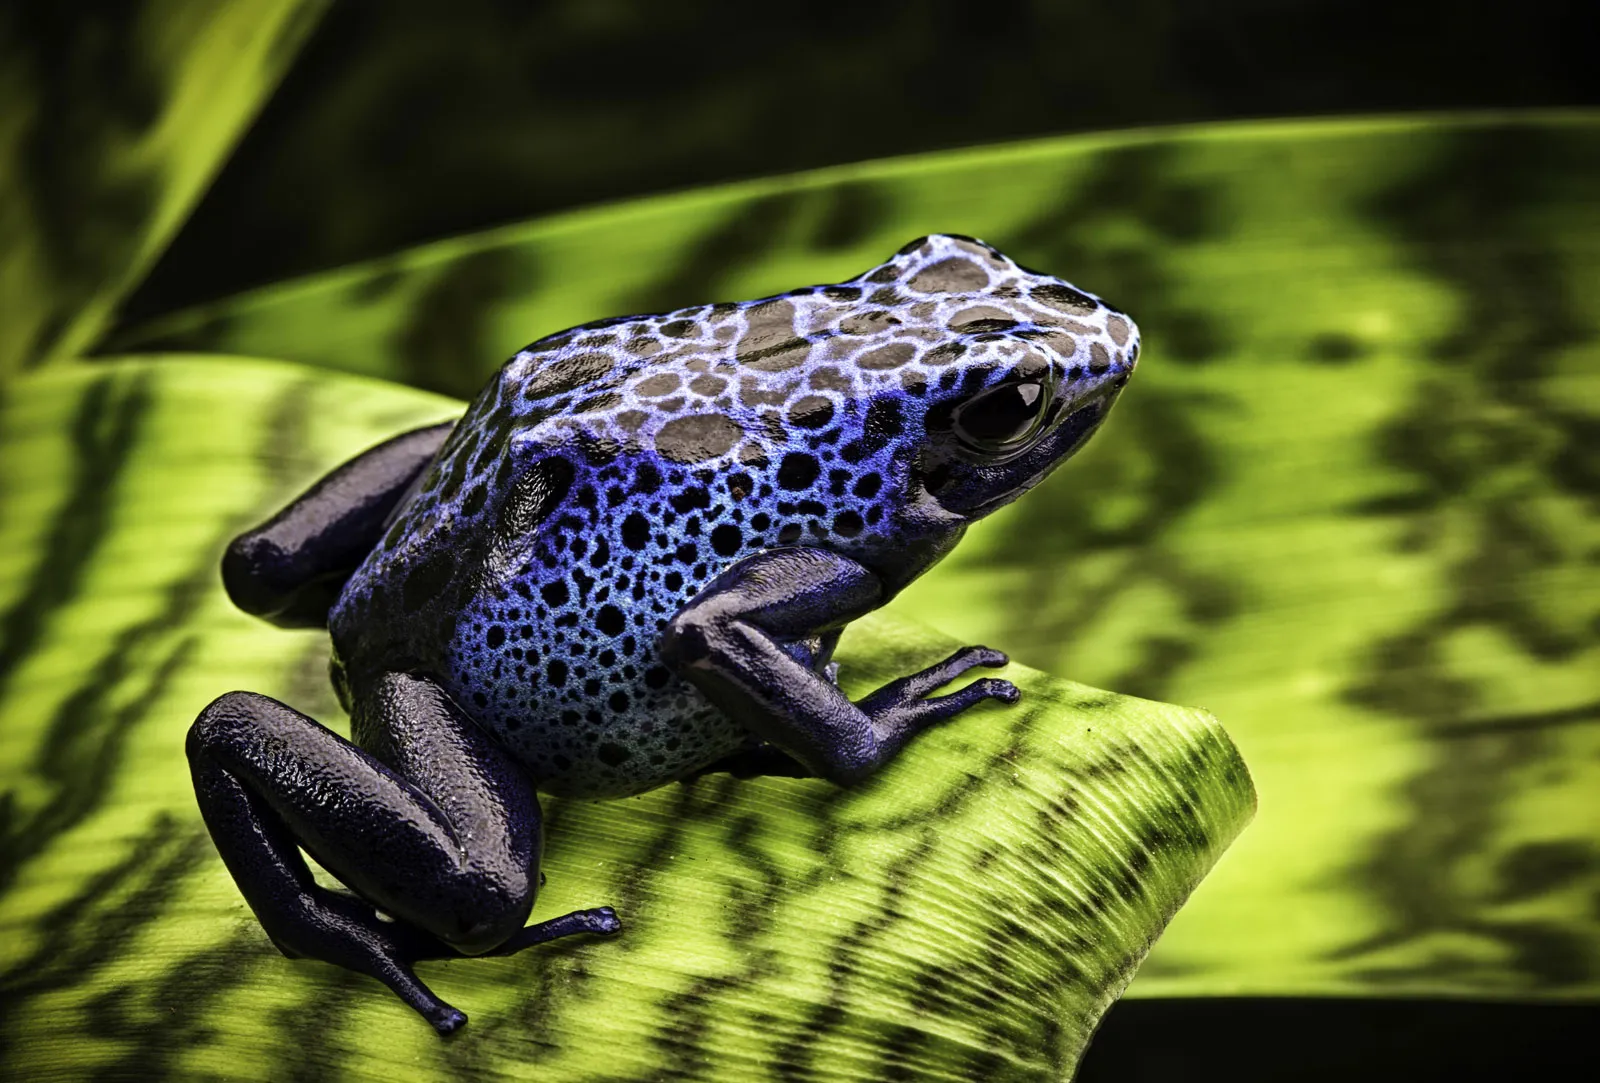

In [22]:
# Load an image
frog_image = cv2.imread('frog.webp')

# Display the image (optional)
cv2_imshow(frog_image)

### Verify the model

In [23]:
# Reshape image
frog_image = cv2.resize(frog_image, (32,32))

prediction3 = model.predict(np.expand_dims(frog_image, axis=0))
predicted_label3 = np.argmax(prediction3)

print(f"Predicted Label: {class_names[predicted_label3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label: truck


# My Customized Model

In [3]:
my_CNN_model = models.Sequential()
my_CNN_model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
my_CNN_model.add(layers.MaxPooling2D((2, 2)))
my_CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
my_CNN_model.add(layers.MaxPooling2D((2, 2)))
my_CNN_model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
my_CNN_model.add(layers.Flatten())
my_CNN_model.add(layers.Dense(64, activation='relu'))
my_CNN_model.add(layers.Dense(10))
my_CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,258 (1.21 MB)

 Trainable params: 317,258 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
my_CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history = my_CNN_model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - categorical_accuracy: 0.0954 - loss: 1.5826 - val_categorical_accuracy: 0.0781 - val_loss: 1.0661
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - categorical_accuracy: 0.0994 - loss: 1.0128 - val_categorical_accuracy: 0.0914 - val_loss: 0.9815
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.1036 - loss: 0.8570 - val_categorical_accuracy: 0.1001 - val_loss: 0.9149
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.1017 - loss: 0.7564 - val_categorical_accuracy: 0.0954 - val_loss: 0.8932
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - categorical_accuracy: 0.1004 - loss: 0.6755 - val_categorical_accuracy: 0.0933 - val_loss: 0.8509
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.1005 - loss: 0.5916 - val_categorical_accuracy: 0.1021 - val_loss: 0.8312
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accura

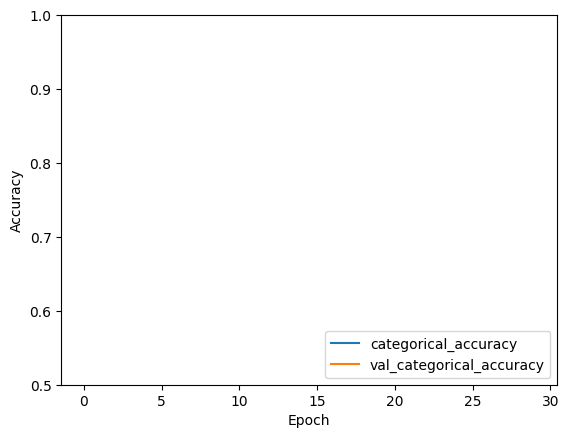

In [16]:
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



### Model Validation

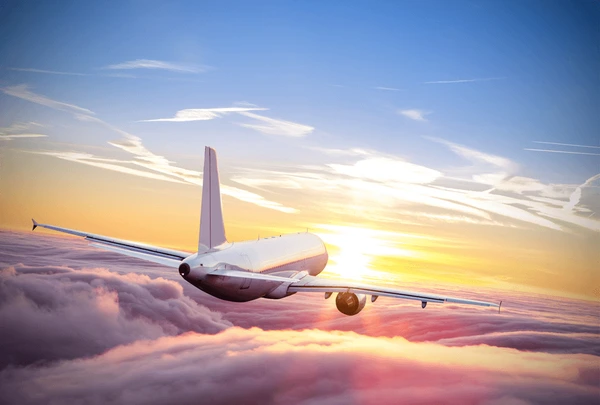

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label: airplane


In [9]:
# Load an image
plane_image = cv2.imread('airplane.webp')

# Display the image (optional)
cv2_imshow(plane_image)

# Reshape image
plane_image = cv2.resize(plane_image, (32,32))

prediction1 = my_CNN_model.predict(np.expand_dims(plane_image, axis=0))
predicted_label1 = np.argmax(prediction1)

print(f"Predicted Label: {class_names[predicted_label1]}")

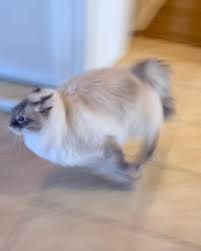

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: airplane


In [10]:
# Load an image
cat_image = cv2.imread('cat.jpeg')

# Display the image (optional)
cv2_imshow(cat_image)
# Reshape image
cat_image = cv2.resize(cat_image, (32,32))

prediction2 = my_CNN_model.predict(np.expand_dims(cat_image, axis=0))
predicted_label2 = np.argmax(prediction2)

print(f"Predicted Label: {class_names[predicted_label2]}")

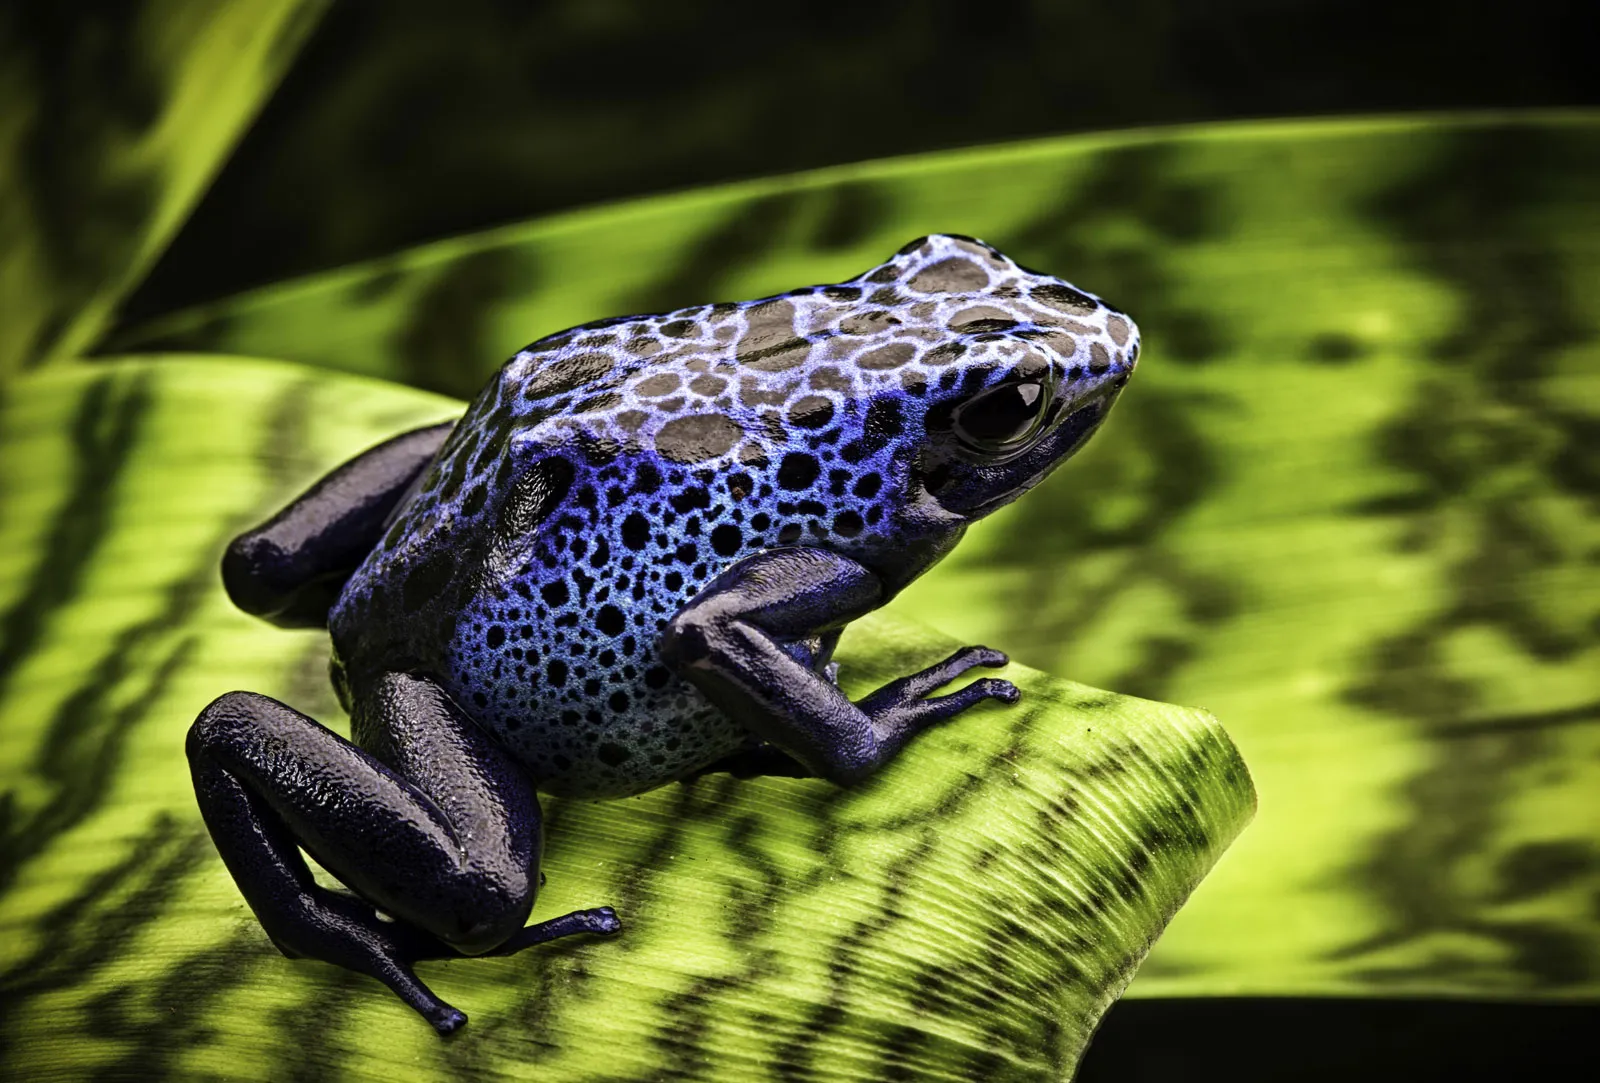

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: frog


In [11]:
# Load an image
frog_image = cv2.imread('frog.webp')

# Display the image (optional)
cv2_imshow(frog_image)
# Reshape image
frog_image = cv2.resize(frog_image, (32,32))

prediction3 = my_CNN_model.predict(np.expand_dims(frog_image, axis=0))
predicted_label3 = np.argmax(prediction3)

print(f"Predicted Label: {class_names[predicted_label3]}")